# Nevyvazene data a distribuovane pocitanie

### Jakub Ševcech, Róbert Móro

IAU, 13.12.2018

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2018-19

## Pýtať sa môžete na http://slido.com#iau2018-w13

# 1. Ako riesit problemy s nevyvazenymi datasetmi

# 2. Distribuovane pocitanie

# 3. Otazky a sirsia diskusia
> ## - Finalziacia zadania
> ## - Co mozete ocakavat na skuske
> ## - ...

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.svm import LinearSVC

In [2]:
plt.rcParams['figure.figsize'] = 9, 6

# Nevyvazene datasety

Kod ukazok ciastocne prebraty a upraveny z https://imbalanced-learn.org

Vyrobime si data

In [45]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=3,
                               n_clusters_per_class=1,
                               weights=[0.05, 0.07, 0.88],
                               class_sep=1.5, random_state=0)

In [51]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([ 53,  74, 873]))

In [119]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    colors = ['purple', 'cyan', 'yellow']
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    for i in range(3):
        ax.scatter(X[y==i, 0], X[y== i, 1], alpha=0.8, edgecolor='k', label=i, c=colors[i])
    ax.legend()

## Ked mame nevyvazene datasety, tak klasifikator sa viac sustredi na majoritnu triedu

V pripade SVM na obrazku to znamena, ze majoritna rieda si k sebe pritiahla hranice rozhodovacieho pravidla na ukor ostatnych tried

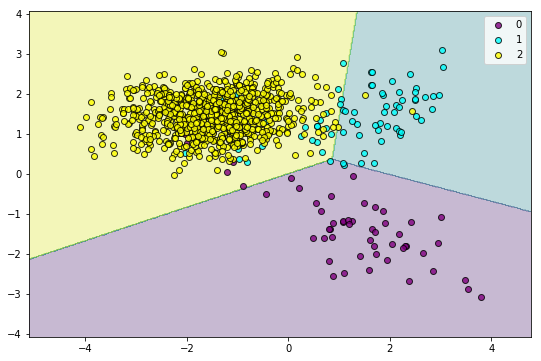

In [120]:
clf = LinearSVC().fit(X, y)
fig, ax = plt.subplots()
plot_decision_function(X, y, clf, ax)

## Niektore algoritmy umoznuju nastavit vahu triedam a tak bojovat proti nevyvazenosti

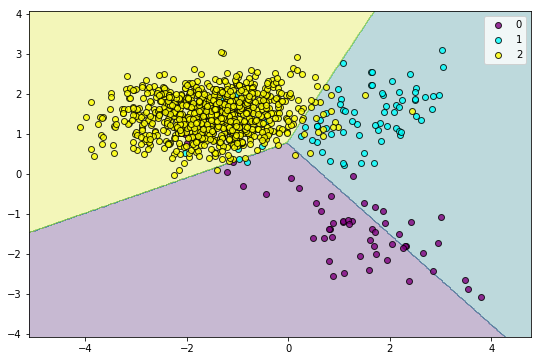

In [121]:
clf = LinearSVC(class_weight={0: 1000, 1:80, 2:5}).fit(X, y)

fig, ax = plt.subplots()
plot_decision_function(X, y, clf, ax)

## Najjednoduchsie ale nie vzdy najlepsie riesenie je nastavit balancovanu vahu triedam

Inverzne proporcna vaha k poctu pozorovani z triedy

n_samples / (n_classes * np.bincount(y))

celkovy pocet pozorovani / pocet tried * pocetnost pozorovani z kazdej triedy

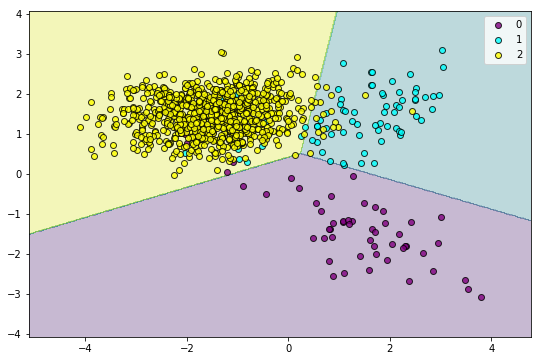

In [122]:
clf = LinearSVC(class_weight='balanced').fit(X, y)

fig, ax = plt.subplots()
plot_decision_function(X, y, clf, ax)

# Undersampling

Znizit pocet pozorovani majoritnej triedy (alebo mnohopocetnych tried)

Vela pristupov snaziacich sa napriklad zachovat vyznamne pozorovania alebo zachovat pokrytie priestoru. Najjednoduchsie nahodne. 

Vyhadzovanie dat robte opatrne. Prichadzate o potencialne zaujimave data. Niekedy to je ale nevyhnutne.

# Random undersampling

dokumentacia implementacie v kniznici imblearn: https://imbalanced-learn.org/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

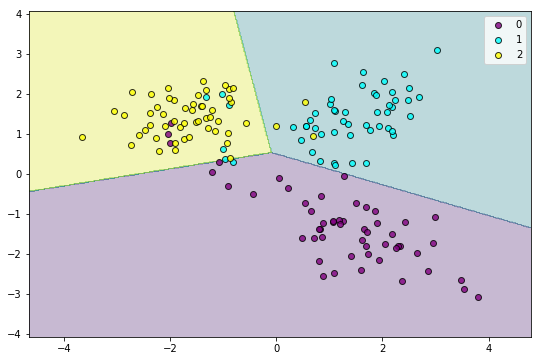

In [130]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X, y)

clf = LinearSVC().fit(X_res, y_res)

fig, ax = plt.subplots()
plot_decision_function(X_res, y_res, clf, ax)

Rozne strategie. Napriklad znizenie poctu len majoritnej triedy alebo znizenie na rovnaky pocet vsetkym

In [131]:
np.unique(y_res, return_counts=True)

(array([0, 1, 2]), array([53, 53, 53]))

## Undersampling so snahou zachovat pokrytie priestoru

Text(0.5,1,'ClusterCentroids undersampling')

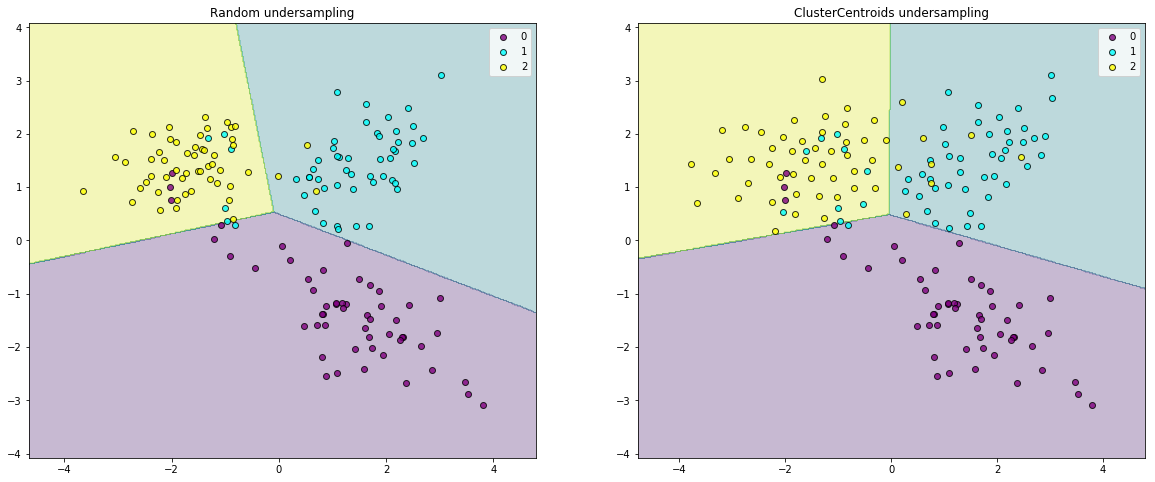

In [132]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_sample(X, y)
clf_cc = LinearSVC().fit(X_cc, y_cc)

fig, ax = plt.subplots(1, 2, figsize=(20,8))
plot_decision_function(X_res, y_res, clf, ax[0])
ax[0].set_title('Random undersampling')
plot_decision_function(X_cc, y_cc, clf_cc, ax[1])
ax[1].set_title('ClusterCentroids undersampling')

# Castokrat zaujimavejsia metoda je Oversampling

Cize zvysenie poctu pozorovani pre malo pocetne triedy

Znova, najjednoduchsie je to nahodne

Text(0.5,1,'Original')

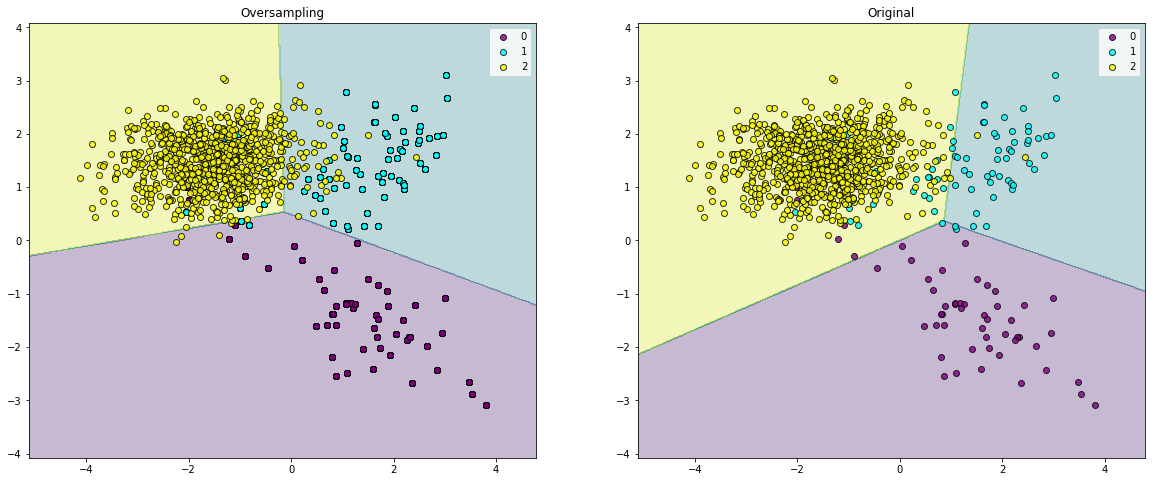

In [127]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X, y)

clf1 = LinearSVC().fit(X_res, y_res)
clf2 = LinearSVC().fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(20,8))
plot_decision_function(X_res, y_res, clf1, ax[0])
ax[0].set_title('Oversampling')
plot_decision_function(X, y, clf2, ax[1])
ax[1].set_title('Original')

## Random oversampling nahodne vybera s opakovanim z povodnej sady. Na obrazku to vidiet ako tmavsie body, pretoze su len opakovane prekreslene cez seba

# Pozor!

Dajte si pozor ak pouzivate random oversampling a rozdelijete data na trenovacie a testovacie (plati aj pre krizovu validaciu).  

Ak najskor spravite oversampling az potom rozdelenie na mnoziny, tak sa vam mozu dostat rovnake pozorovania do trenovacej aj testovacej vzorky. Testovacia vzorka vam neda spravnu predstavu o uspesnosti na novych datach. Lebo bude obsahovat rovnake data ako trenovacia. Rozdelujte data pred oversamplingom.

# Existuju aj sofistikovanejsie metody, ktore sa snazia vytvorit nove, podobne pozorovania

Napr.: SMOTE

Text(0.5,1,'Original')

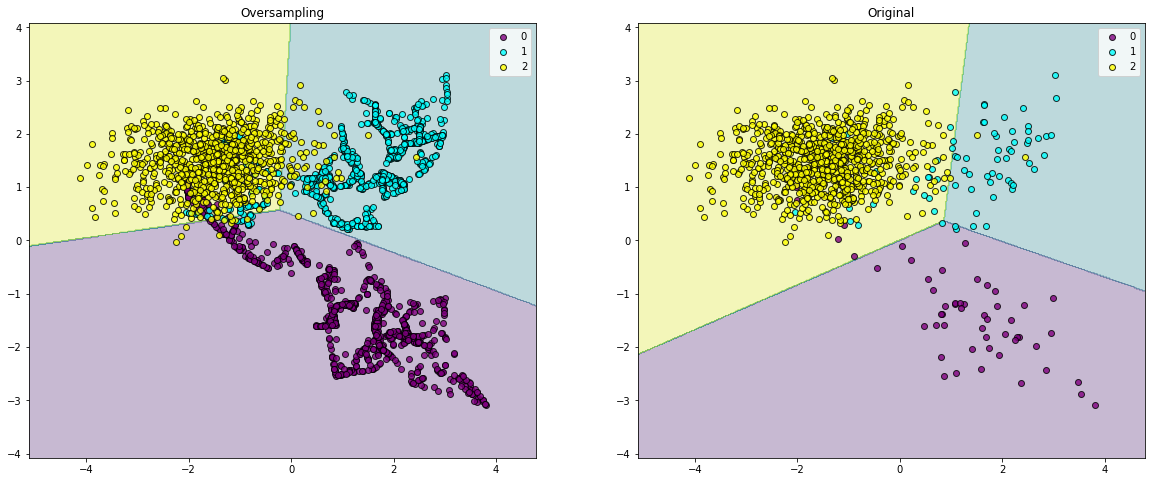

In [128]:
from imblearn.over_sampling import SMOTE

sos = SMOTE(random_state=42)
X_res, y_res = sos.fit_sample(X, y)

clf1 = LinearSVC().fit(X_res, y_res)
clf2 = LinearSVC().fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(20,8))
plot_decision_function(X_res, y_res, clf1, ax[0])
ax[0].set_title('Oversampling')
plot_decision_function(X, y, clf2, ax[1])
ax[1].set_title('Original')

## SMOTE sa snazi vybrat nahodne pozorovania a z nich vytvorit nove pozorovania ako ich priemer

# Moznosti riesenia nevyvazenych tried

* Vaha tried priamo v uciacom sa algoritme (class_weight)
* Undersampling
* Oversampling 
> * Random oversampling
> * Smote

Pozor na pretecenie do tesovacej sade pri oversamplingu

# Distribuovane pocitanie

[13_distribuovane_pocitanie.ipynb](13_distribuovane_pocitanie.ipynb)

# Co si zobrat z tejto prednasky

* Existuje viacero moznosti ako riesit problem nevyvazenych tried: Nastavenie uciaceho sa algoritmu, undersampling, oversampling.
* Pre kazdy zo sposbov riesenia nevyvazenosti existuje kopec dalsich specifickych rieseni
* Pri praci s vela datami nemusim byt obmedzeny na vypoctove prostriedky jedneho pocitaca. Existuje kopec nastrojov pomocou ktorych viem spracovat velke objemy dat. 
* Nastrojov je vela a su pomerne uzko specializovane. 
* Distribuovana praca s vela datami nemusi byt na prvy pohlad velmi odlysna od prace s lokalnym datasetom. Na pozadi sa toho ale deje celkom vela.

# Diskusia

# Priklady otazok:

* V akom poradi treba vykonavat oversampling a rozdelenie na mnoziny v krizovej validacii a preco?